# Iris Species Classification

**Business Context**

Iris is a genus of showy flowering plants which included upto 300 species. Each species of Iris has it's own value. Some of the species are used in medicine, water purification, perfume manufacturing, and so on. The purpose of this classification model is classify different species of Iris, so theat they can be processed and used for different purposes.

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

### **Importing Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
%matplotlib inline

## Data Ingest

In [0]:
url = 'https://raw.github.com/krithikaceg/Statistical-Analysis/master/Classification_of_Iris_species/Iris.csv'
iris = pd.read_csv(url)
#print first 10 rows
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
20,21,5.4,3.4,1.7,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
106,107,4.9,2.5,4.5,1.7,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
131,132,7.9,3.8,6.4,2.0,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
113,114,5.7,2.5,5.0,2.0,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa


### Data Columns

In [0]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Data Info

In [0]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [0]:
iris.drop('Id',axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

### Distribution range of each attribute

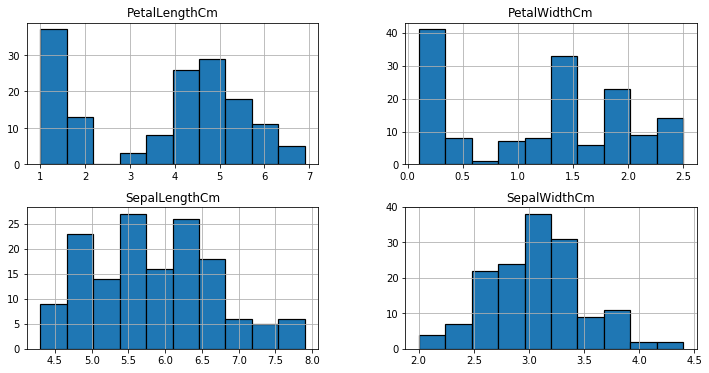

In [0]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Scatter Plot for Sepal

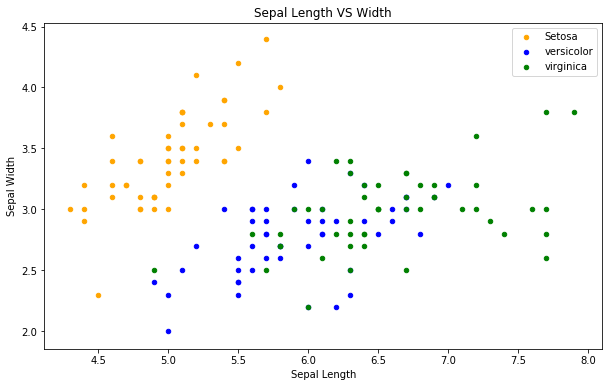

In [0]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### Scatter Plot for Petal

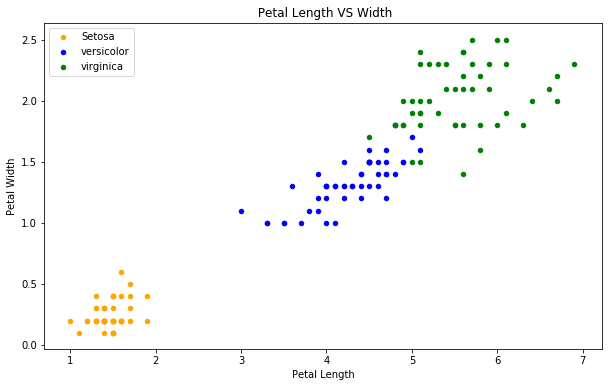

In [0]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### Correlation Heatmap

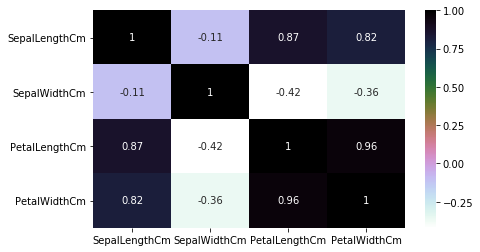

In [0]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

As we can see in the correlation heat map, petal length and petal width are highly correlated. While designing our model, we shoudl consider this attribute to avoid auto-correlation.

## Modeling

### Splitting train test dataset

In [0]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [0]:
y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### SVC

In [0]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Score without Hyper parameter tuning %s" %metrics.accuracy_score(y_pred, y_test))

import warnings
warnings.filterwarnings('ignore')
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

score ='recall'

print("# Tuning hyper-parameters for %s" % score)
print()

try:
  clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                     scoring='%s_macro' % score)
  clf.fit(X_train, y_train)
  
  print("Best parameters set found on development set:")
  print()
  print("Score: %s" %metrics.accuracy_score(y_pred, y_test))
  print("Parameters are %s" %clf.best_params_)
  
  y_true, y_pred = y_test, clf.predict(X_test)
  print(classification_report(y_true, y_pred))
  print()
except:
  None





Score without Hyper parameter tuning 0.9777777777777777
# Tuning hyper-parameters for recall

Best parameters set found on development set:

Score: 0.9777777777777777
Parameters are {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

      micro avg       0.98      0.98      0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45




### Logistic Regression

In [0]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is %s' %metrics.accuracy_score(prediction, y_test))



import warnings
warnings.filterwarnings('ignore')
tuned_parameters = {#'dual': [True,False], 
                    #'max_iter':[100,110,120,130,140], 
                    'C': [0.01, 0.1, 1, 10, 100, 1000],
                    #'penalty': ['l1', 'l2'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                    #'multi_class': ['ovr', 'multinomial', 'auto']                   
                   }
score = 'recall'
print("# Tuning hyper-parameters for %s" % score)
print()
try:
  clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                     scoring='%s_macro' % score)
  clf.fit(X_train, y_train)
  print("Best parameters set found on development set:")
  print()
  print(clf.best_params_)
  print()
except:
  None



y_pred = clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(metrics.accuracy_score(prediction, y_test))

The accuracy of the Logistic Regression is 0.8888888888888888
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 100, 'solver': 'liblinear'}

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.89      0.94        18
 Iris-virginica       0.85      1.00      0.92        11

      micro avg       0.96      0.96      0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45


0.8888888888888888


### Random Forest Classifier

In [0]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Random Forest Classifier is %s' %metrics.accuracy_score(prediction, y_test))



import warnings
warnings.filterwarnings('ignore')
tuned_parameters = {'n_estimators': [10, 20, 50, 100],
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [5, 10, 15, 20],
                    'max_features': ['auto', 'sqrt', 'log2']
                   }
score = 'recall'
print("Tuning hyper-parameters for %s" % score)
print()
try:
  clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                     scoring='%s_macro' % score)
  clf.fit(X_train, y_train)
  print("Best parameters set found on development set:")
  print()
  print(clf.best_params_)
  print()
  y_true, y_pred = y_test, clf.predict(X_test)
  print(classification_report(y_true, y_pred))
  print()
  print(metrics.accuracy_score(prediction, y_test))
  print(clf.summary())
except:
  None





The accuracy of the Random Forest Classifier is 0.9777777777777777
Tuning hyper-parameters for recall

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 10}

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

      micro avg       0.98      0.98      0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45


0.9777777777777777


## Performance measurement

### Confusion Matrix

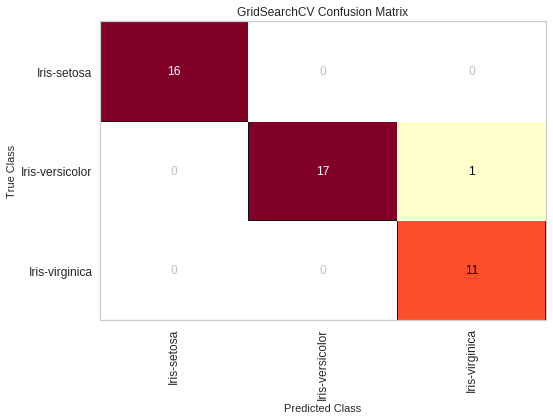

In [0]:
cm = ConfusionMatrix(clf, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

Confusion matrix reveals that only 1 out of 45 is predicted wrongly. Ou model is good and the data that is given is able to clearly classify.

### Precision and Recall

In [0]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

      micro avg       0.98      0.98      0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



There are three classifications here and they are equally distributed. We can increase the score of precision for one classification without affecting the score of other classifications only when the model predicts correctly.


### ROC and AUC

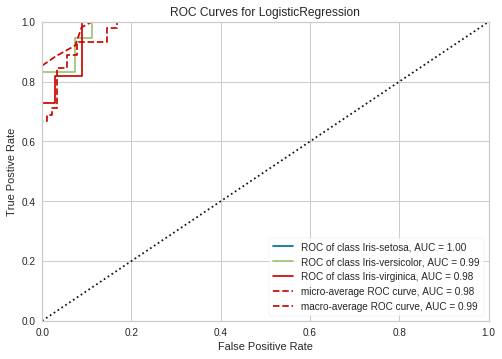

In [0]:
from yellowbrick.classifier import ROCAUC
clf = LogisticRegression()
classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(clf, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

AUC score is nearly 1. This is definitely a good inidcator that the model is performing well. Also, as we can observe the curve, it is steep in the left indicating the lower number of false positives.

## Recommendations

Our model predicts with 97% accuracy which is definitely a good prediction. Below are few recommendations to our stakeholders:

1. We are not provided any information on the color of the species. Color would be a significant attribute in deciding the species.

2. There are several other varieties of Iris species such as Iris Adriatica, Iris Albiens and so on. But we are only given the data of three species. If we receive the data from different species after our model is trained, it would predict wrongly. 

3. As we can see from the above charts, petal length and petal width can distinguish the species better. 
We are given only 50 datasets for each species. If we are given even more, we can build a robust  model that can predict much better. 

## Machine Learning Canvas:

![alt text](https://raw.github.com/krithikaceg/Statistical-Analysis/master/Classification_of_Iris_species/classification_Iris.png)